## Mushroom Classification Day-2 (ver.2)
Day-2で追加したステートメントは #DAY-2でコメント表記しています。

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from IPython.display import display
from dateutil.parser import parse
import matplotlib.pyplot as plt

# DAY-2
import seaborn as sns
import graphviz
import pydotplus
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.model_selection import GridSearchCV

### ファイルの読み込み

In [2]:
df_data = pd.read_csv("../1_data/mushrooms.csv")
print(df_data.columns)
display(df_data.head())
display(df_data.tail())

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [3]:
print(df_data.shape)
print(df_data['class'].unique())

(8124, 23)
['p' 'e']


データは、データ数8124、特徴22項目からなる。分類は、毒キノコと食用キノコの２種類ある。

各特徴グループ毎に何種類のデータがあるか調べておく。

In [4]:
for col in df_data.columns:
    print(str(col) + ':')
    print(df_data[col].unique())

class:
['p' 'e']
cap-shape:
['x' 'b' 's' 'f' 'k' 'c']
cap-surface:
['s' 'y' 'f' 'g']
cap-color:
['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises:
['t' 'f']
odor:
['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment:
['f' 'a']
gill-spacing:
['c' 'w']
gill-size:
['n' 'b']
gill-color:
['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape:
['e' 't']
stalk-root:
['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring:
['s' 'f' 'k' 'y']
stalk-surface-below-ring:
['s' 'f' 'y' 'k']
stalk-color-above-ring:
['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring:
['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type:
['p']
veil-color:
['w' 'n' 'o' 'y']
ring-number:
['o' 't' 'n']
ring-type:
['p' 'e' 'l' 'f' 'n']
spore-print-color:
['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population:
['s' 'n' 'a' 'v' 'y' 'c']
habitat:
['u' 'g' 'm' 'd' 'p' 'w' 'l']


### 欠損値のチェック

In [5]:
# Count missing
pd.DataFrame(df_data.isnull().sum(), columns=["num of missing"])

,num of missing
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


欠損データはなさそう。
食用か毒キノコかの視点で、各特徴グループ毎の分布を調べてみる。

In [6]:
# Cross tab
for col in df_data.columns:
    if col=="class":
        continue
    print(col)
    df_c = pd.crosstab(index=df_data["class"], columns=df_data[col],margins=True)
    display(df_c)

cap-shape


cap-shape,b,c,f,k,s,x,All
class,,,,,,,
e,404,0,1596,228,32,1948,4208
p,48,4,1556,600,0,1708,3916
All,452,4,3152,828,32,3656,8124


cap-surface


cap-surface,f,g,s,y,All
class,,,,,
e,1560,0,1144,1504,4208
p,760,4,1412,1740,3916
All,2320,4,2556,3244,8124


cap-color


cap-color,b,c,e,g,n,p,r,u,w,y,All
class,,,,,,,,,,,
e,48,32,624,1032,1264,56,16,16,720,400,4208
p,120,12,876,808,1020,88,0,0,320,672,3916
All,168,44,1500,1840,2284,144,16,16,1040,1072,8124


bruises


bruises,f,t,All
class,,,
e,1456,2752,4208
p,3292,624,3916
All,4748,3376,8124


odor


odor,a,c,f,l,m,n,p,s,y,All
class,,,,,,,,,,
e,400,0,0,400,0,3408,0,0,0,4208
p,0,192,2160,0,36,120,256,576,576,3916
All,400,192,2160,400,36,3528,256,576,576,8124


gill-attachment


gill-attachment,a,f,All
class,,,
e,192,4016,4208
p,18,3898,3916
All,210,7914,8124


gill-spacing


gill-spacing,c,w,All
class,,,
e,3008,1200,4208
p,3804,112,3916
All,6812,1312,8124


gill-size


gill-size,b,n,All
class,,,
e,3920,288,4208
p,1692,2224,3916
All,5612,2512,8124


gill-color


gill-color,b,e,g,h,k,n,o,p,r,u,w,y,All
class,,,,,,,,,,,,,
e,0,96,248,204,344,936,64,852,0,444,956,64,4208
p,1728,0,504,528,64,112,0,640,24,48,246,22,3916
All,1728,96,752,732,408,1048,64,1492,24,492,1202,86,8124


stalk-shape


stalk-shape,e,t,All
class,,,
e,1616,2592,4208
p,1900,2016,3916
All,3516,4608,8124


stalk-root


stalk-root,?,b,c,e,r,All
class,,,,,,
e,720,1920,512,864,192,4208
p,1760,1856,44,256,0,3916
All,2480,3776,556,1120,192,8124


stalk-surface-above-ring


stalk-surface-above-ring,f,k,s,y,All
class,,,,,
e,408,144,3640,16,4208
p,144,2228,1536,8,3916
All,552,2372,5176,24,8124


stalk-surface-below-ring


stalk-surface-below-ring,f,k,s,y,All
class,,,,,
e,456,144,3400,208,4208
p,144,2160,1536,76,3916
All,600,2304,4936,284,8124


stalk-color-above-ring


stalk-color-above-ring,b,c,e,g,n,o,p,w,y,All
class,,,,,,,,,,
e,0,0,96,576,16,192,576,2752,0,4208
p,432,36,0,0,432,0,1296,1712,8,3916
All,432,36,96,576,448,192,1872,4464,8,8124


stalk-color-below-ring


stalk-color-below-ring,b,c,e,g,n,o,p,w,y,All
class,,,,,,,,,,
e,0,0,96,576,64,192,576,2704,0,4208
p,432,36,0,0,448,0,1296,1680,24,3916
All,432,36,96,576,512,192,1872,4384,24,8124


veil-type


veil-type,p,All
class,,
e,4208,4208
p,3916,3916
All,8124,8124


veil-color


veil-color,n,o,w,y,All
class,,,,,
e,96,96,4016,0,4208
p,0,0,3908,8,3916
All,96,96,7924,8,8124


ring-number


ring-number,n,o,t,All
class,,,,
e,0,3680,528,4208
p,36,3808,72,3916
All,36,7488,600,8124


ring-type


ring-type,e,f,l,n,p,All
class,,,,,,
e,1008,48,0,0,3152,4208
p,1768,0,1296,36,816,3916
All,2776,48,1296,36,3968,8124


spore-print-color


spore-print-color,b,h,k,n,o,r,u,w,y,All
class,,,,,,,,,,
e,48,48,1648,1744,48,0,48,576,48,4208
p,0,1584,224,224,0,72,0,1812,0,3916
All,48,1632,1872,1968,48,72,48,2388,48,8124


population


population,a,c,n,s,v,y,All
class,,,,,,,
e,384,288,400,880,1192,1064,4208
p,0,52,0,368,2848,648,3916
All,384,340,400,1248,4040,1712,8124


habitat


habitat,d,g,l,m,p,u,w,All
class,,,,,,,,
e,1880,1408,240,256,136,96,192,4208
p,1268,740,592,36,1008,272,0,3916
All,3148,2148,832,292,1144,368,192,8124


In [7]:
# Cross tab %
for col in df_data.columns:
    if col=="class":
        continue
    print(col)
    df_c = pd.crosstab(index=df_data["class"], columns=df_data[col],margins=True,normalize=True)
    display(df_c)

cap-shape


cap-shape,b,c,f,k,s,x,All
class,,,,,,,
e,0.049729,0.000000,0.196455,0.028065,0.003939,0.239783,0.517971
p,0.005908,0.000492,0.191531,0.073855,0.000000,0.210241,0.482029
All,0.055638,0.000492,0.387986,0.101920,0.003939,0.450025,1.000000


cap-surface


cap-surface,f,g,s,y,All
class,,,,,
e,0.192024,0.000000,0.140817,0.185130,0.517971
p,0.093550,0.000492,0.173806,0.214180,0.482029
All,0.285574,0.000492,0.314623,0.399311,1.000000


cap-color


cap-color,b,c,e,g,n,p,r,u,w,y,All
class,,,,,,,,,,,
e,0.005908,0.003939,0.076809,0.127031,0.155588,0.006893,0.001969,0.001969,0.088626,0.049237,0.517971
p,0.014771,0.001477,0.107829,0.099458,0.125554,0.010832,0.000000,0.000000,0.039389,0.082718,0.482029
All,0.020679,0.005416,0.184638,0.226489,0.281142,0.017725,0.001969,0.001969,0.128016,0.131955,1.000000


bruises


bruises,f,t,All
class,,,
e,0.179222,0.338749,0.517971
p,0.405219,0.076809,0.482029
All,0.584441,0.415559,1.000000


odor


odor,a,c,f,l,m,n,p,s,y,All
class,,,,,,,,,,
e,0.049237,0.000000,0.000000,0.049237,0.000000,0.419498,0.000000,0.000000,0.000000,0.517971
p,0.000000,0.023634,0.265879,0.000000,0.004431,0.014771,0.031512,0.070901,0.070901,0.482029
All,0.049237,0.023634,0.265879,0.049237,0.004431,0.434269,0.031512,0.070901,0.070901,1.000000


gill-attachment


gill-attachment,a,f,All
class,,,
e,0.023634,0.494338,0.517971
p,0.002216,0.479813,0.482029
All,0.025849,0.974151,1.000000


gill-spacing


gill-spacing,c,w,All
class,,,
e,0.370261,0.147710,0.517971
p,0.468242,0.013786,0.482029
All,0.838503,0.161497,1.000000


gill-size


gill-size,b,n,All
class,,,
e,0.482521,0.035451,0.517971
p,0.208272,0.273757,0.482029
All,0.690793,0.309207,1.000000


gill-color


gill-color,b,e,g,h,k,n,o,p,r,u,w,y,All
class,,,,,,,,,,,,,
e,0.000000,0.011817,0.030527,0.025111,0.042344,0.115214,0.007878,0.104874,0.000000,0.054653,0.117676,0.007878,0.517971
p,0.212703,0.000000,0.062038,0.064993,0.007878,0.013786,0.000000,0.078779,0.002954,0.005908,0.030281,0.002708,0.482029
All,0.212703,0.011817,0.092565,0.090103,0.050222,0.129000,0.007878,0.183653,0.002954,0.060561,0.147957,0.010586,1.000000


stalk-shape


stalk-shape,e,t,All
class,,,
e,0.198917,0.319055,0.517971
p,0.233875,0.248154,0.482029
All,0.432792,0.567208,1.000000


stalk-root


stalk-root,?,b,c,e,r,All
class,,,,,,
e,0.088626,0.236337,0.063023,0.106352,0.023634,0.517971
p,0.216642,0.228459,0.005416,0.031512,0.000000,0.482029
All,0.305268,0.464796,0.068439,0.137863,0.023634,1.000000


stalk-surface-above-ring


stalk-surface-above-ring,f,k,s,y,All
class,,,,,
e,0.050222,0.017725,0.448055,0.001969,0.517971
p,0.017725,0.274249,0.189069,0.000985,0.482029
All,0.067947,0.291974,0.637125,0.002954,1.000000


stalk-surface-below-ring


stalk-surface-below-ring,f,k,s,y,All
class,,,,,
e,0.056130,0.017725,0.418513,0.025603,0.517971
p,0.017725,0.265879,0.189069,0.009355,0.482029
All,0.073855,0.283604,0.607582,0.034958,1.000000


stalk-color-above-ring


stalk-color-above-ring,b,c,e,g,n,o,p,w,y,All
class,,,,,,,,,,
e,0.000000,0.000000,0.011817,0.070901,0.001969,0.023634,0.070901,0.338749,0.000000,0.517971
p,0.053176,0.004431,0.000000,0.000000,0.053176,0.000000,0.159527,0.210734,0.000985,0.482029
All,0.053176,0.004431,0.011817,0.070901,0.055145,0.023634,0.230428,0.549483,0.000985,1.000000


stalk-color-below-ring


stalk-color-below-ring,b,c,e,g,n,o,p,w,y,All
class,,,,,,,,,,
e,0.000000,0.000000,0.011817,0.070901,0.007878,0.023634,0.070901,0.332841,0.000000,0.517971
p,0.053176,0.004431,0.000000,0.000000,0.055145,0.000000,0.159527,0.206795,0.002954,0.482029
All,0.053176,0.004431,0.011817,0.070901,0.063023,0.023634,0.230428,0.539636,0.002954,1.000000


veil-type


veil-type,p,All
class,,
e,0.517971,0.517971
p,0.482029,0.482029
All,1.000000,1.000000


veil-color


veil-color,n,o,w,y,All
class,,,,,
e,0.011817,0.011817,0.494338,0.000000,0.517971
p,0.000000,0.000000,0.481044,0.000985,0.482029
All,0.011817,0.011817,0.975382,0.000985,1.000000


ring-number


ring-number,n,o,t,All
class,,,,
e,0.000000,0.452979,0.064993,0.517971
p,0.004431,0.468735,0.008863,0.482029
All,0.004431,0.921713,0.073855,1.000000


ring-type


ring-type,e,f,l,n,p,All
class,,,,,,
e,0.124077,0.005908,0.000000,0.000000,0.387986,0.517971
p,0.217627,0.000000,0.159527,0.004431,0.100443,0.482029
All,0.341704,0.005908,0.159527,0.004431,0.488429,1.000000


spore-print-color


spore-print-color,b,h,k,n,o,r,u,w,y,All
class,,,,,,,,,,
e,0.005908,0.005908,0.202856,0.214673,0.005908,0.000000,0.005908,0.070901,0.005908,0.517971
p,0.000000,0.194978,0.027573,0.027573,0.000000,0.008863,0.000000,0.223043,0.000000,0.482029
All,0.005908,0.200886,0.230428,0.242245,0.005908,0.008863,0.005908,0.293944,0.005908,1.000000


population


population,a,c,n,s,v,y,All
class,,,,,,,
e,0.047267,0.035451,0.049237,0.108321,0.146726,0.130970,0.517971
p,0.000000,0.006401,0.000000,0.045298,0.350566,0.079764,0.482029
All,0.047267,0.041851,0.049237,0.153619,0.497292,0.210734,1.000000


habitat


habitat,d,g,l,m,p,u,w,All
class,,,,,,,,
e,0.231413,0.173314,0.029542,0.031512,0.016741,0.011817,0.023634,0.517971
p,0.156081,0.091088,0.072871,0.004431,0.124077,0.033481,0.000000,0.482029
All,0.387494,0.264402,0.102413,0.035943,0.140817,0.045298,0.023634,1.000000


In [8]:
# Check how many unknown instances denoted by "?" are in stalk-root column
missdata = df_data['stalk-root'].isin(['?']).sum()
print(missdata)

2480


キノコの根の形状(Stalk-root)が不明で '?' と記されているインスタンスが2480個ある。

### データ変換
値が文字なので、統計解析しやすいように各特徴毎のone-hot形式のデータに変換する

In [9]:
df_str = df_data.copy()
for col in df_data.columns:
    col_str = col+"-str"
    df_str[col_str] = df_data[col].astype(str).map(lambda x: col+'-'+x)
    if col == "class":
        df_new = pd.get_dummies(df_str[col_str])
    else:
        df_new = pd.concat([df_new, pd.get_dummies(df_str[col_str])], axis = 1)
print(df_new.columns)
display(df_new.head())
display(df_new.tail())

Index(['class-e', 'class-p', 'cap-shape-b', 'cap-shape-c', 'cap-shape-f',
       'cap-shape-k', 'cap-shape-s', 'cap-shape-x', 'cap-surface-f',
       'cap-surface-g',
       ...
       'population-s', 'population-v', 'population-y', 'habitat-d',
       'habitat-g', 'habitat-l', 'habitat-m', 'habitat-p', 'habitat-u',
       'habitat-w'],
      dtype='object', length=119)


,class-e,class-p,cap-shape-b,cap-shape-c,cap-shape-f,cap-shape-k,cap-shape-s,cap-shape-x,cap-surface-f,cap-surface-g,...,population-s,population-v,population-y,habitat-d,habitat-g,habitat-l,habitat-m,habitat-p,habitat-u,habitat-w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


,class-e,class-p,cap-shape-b,cap-shape-c,cap-shape-f,cap-shape-k,cap-shape-s,cap-shape-x,cap-surface-f,cap-surface-g,...,population-s,population-v,population-y,habitat-d,habitat-g,habitat-l,habitat-m,habitat-p,habitat-u,habitat-w
8119,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
8121,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
8123,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


各特徴グループにおいて選択肢が２つしかないタイプのグループは、One-hot化されたので片方を削除しておく。その際、上記で検出したstalk-root = '?'の列と選択肢が１つしかないveil-typeも削除して解析対象から外しておく。

In [10]:
df_new_clean = df_new.drop(["stalk-root-?", "class-e", "bruises-t", "gill-attachment-f","gill-spacing-w", "gill-size-n", 
                               "stalk-shape-t", "veil-type-p"], axis = 1)
display(df_new_clean.head())
display(df_new_clean.tail())

,class-p,cap-shape-b,cap-shape-c,cap-shape-f,cap-shape-k,cap-shape-s,cap-shape-x,cap-surface-f,cap-surface-g,cap-surface-s,...,population-s,population-v,population-y,habitat-d,habitat-g,habitat-l,habitat-m,habitat-p,habitat-u,habitat-w
0,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


,class-p,cap-shape-b,cap-shape-c,cap-shape-f,cap-shape-k,cap-shape-s,cap-shape-x,cap-surface-f,cap-surface-g,cap-surface-s,...,population-s,population-v,population-y,habitat-d,habitat-g,habitat-l,habitat-m,habitat-p,habitat-u,habitat-w
8119,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8122,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
8123,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0


相関係数を求めてみる

In [11]:
df_new_clean.corr().style.background_gradient().format('{:.2f}')

### データ解析

abs(相関係数) >= 0.45のグループを説明変数に設定してロジスティック回帰を実行してみる

学習データ(60%)と検証データ(40%)を分割して用意する。最後のモデルの精度をレポートする。

In [12]:
# 目的変数と説明変数を設定
y = ((df_new_clean["class-p"] > 0) * 1).values
x = df_new_clean[["bruises-f", "odor-f", "odor-n", "gill-size-b", "gill-color-b", "stalk-surface-above-ring-k", 
                  "stalk-surface-above-ring-s", "stalk-surface-below-ring-k", "ring-type-l", "ring-type-p", 
                  "spore-print-color-h"]]

# 学習データと検証データを分離
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

print(len(x_train))
print(len(x_test))

model = LogisticRegression()
print(model)
model.fit(x_train, y_train)

pred = model.predict(x_test)

# モデル精度
score = accuracy_score(y_test, pred)
print('score: %s' % score)
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

5686
2438
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
score: 0.9774405250205086
             precision    recall  f1-score   support

          0       0.98      0.97      0.98      1273
          1       0.97      0.98      0.98      1165

avg / total       0.98      0.98      0.98      2438

[[1240   33]
 [  22 1143]]


### Day-1時点での精度: 0.976

### Day-2: 決定木による分類

In [13]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# 目的変数と説明変数を設定
y = ((df_new_clean["class-p"] > 0) * 1).values   #"*1"はBoolian値を整数化するためのもの
x = df_new_clean[["bruises-f", "odor-f", "odor-n", "gill-size-b", "gill-color-g", "stalk-surface-above-ring-k",
                 "stalk-surface-above-ring-s", "stalk-surface-below-ring-k", "ring-type-l", "ring-type-p",
                 "spore-print-color-h"]]

# 学習データと検証データを分離
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# 決定木による分類。不純物指標はジニ係数を採用
clf = DecisionTreeClassifier(criterion="gini", max_depth=None, min_samples_split=3, min_samples_leaf=3, random_state=1234)
clf.fit(x_train, y_train)
print("score=", clf.score(x_train, y_train))

# モデル精度検証
y_pred = clf.predict(x_test) 
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

score= 0.98047836792121
             precision    recall  f1-score   support

          0       0.99      0.98      0.98      1230
          1       0.98      0.99      0.98      1208

avg / total       0.98      0.98      0.98      2438

[[1203   27]
 [  14 1194]]


決定木の精度 0.979でロジスティック回帰の精度をわずかに上回った。

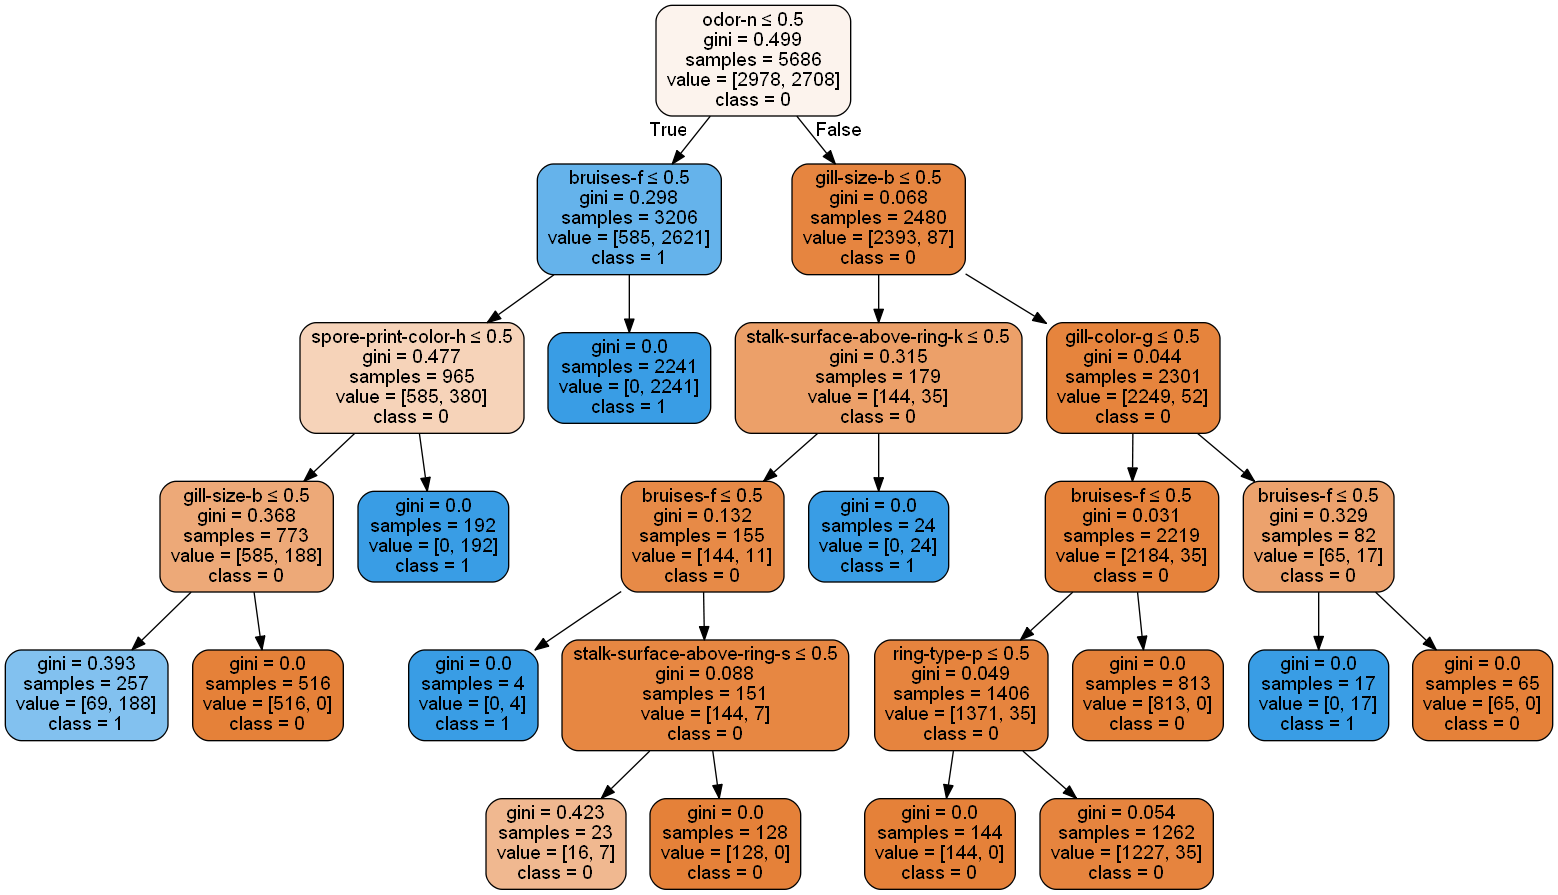

In [14]:
# 決定木の描画

# scikit_learnには、学習後の決定木を.dotファイルとしてエクスポートできる機能がある。
dot_data = StringIO() #dotファイル情報の格納先。

export_graphviz(clf, out_file=dot_data,  
                     feature_names=x_train.columns,  
                     class_names=["0","1"],  #食用キノコはclass_p="0", 毒キノコはclass_p="1"
                     filled=True, rounded=True,  
                     special_characters=True) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

### Cross Validationによるパラメータ探索
決定木のパラメータ(max_depth, min_samples_split, min_samples_leaf)の最適値をサーチしてみる。

In [15]:
param_grid = [{'max_depth':[3,4,5], 'min_samples_split':[2,3,4], 'min_samples_leaf':[1,2,3,4,5]}]
cv = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=5)
cv.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_depth': [3, 4, 5], 'min_samples_split': [2, 3, 4], 'min_samples_leaf': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

最良なパラメータを出力させてみると

In [16]:
cv.best_params_

{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [17]:
print(classification_report(y_test,cv.best_estimator_.predict(x_test)))

             precision    recall  f1-score   support

          0       0.99      0.98      0.98      1230
          1       0.98      0.99      0.98      1208

avg / total       0.98      0.98      0.98      2438



In [18]:
# 最適パラメータを使って決定木による再分類
clf = DecisionTreeClassifier(criterion="gini", max_depth=5, min_samples_split=2, min_samples_leaf=1, random_state=1234)
clf.fit(x_train, y_train)
print("score=", clf.score(x_train, y_train))

# モデル精度検証
y_pred = clf.predict(x_test) 
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

score= 0.98047836792121
             precision    recall  f1-score   support

          0       0.99      0.98      0.98      1230
          1       0.98      0.99      0.98      1208

avg / total       0.98      0.98      0.98      2438

[[1203   27]
 [  14 1194]]


Cross Validationによるパラメータ最適化の前後で精度に変化なし。

### ランダムフォレストによる分類

In [19]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10, max_depth=2, criterion="gini",
                             min_samples_leaf=2, min_samples_split=2, random_state=1234)

clf.fit(x_train, y_train)
print("score=", clf.score(x_train, y_train))

# モデル精度検証
y_pred = clf.predict(x_test) 
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

score= 0.972564192754133
             precision    recall  f1-score   support

          0       0.97      0.98      0.98      1230
          1       0.98      0.97      0.98      1208

avg / total       0.98      0.98      0.98      2438

[[1203   27]
 [  33 1175]]


精度に大きな変化なし。もしかすると「いつも決まって誤判定するキノコ」が存在するのか。。。

### アダブーストによる分類

In [20]:
from sklearn.ensemble import AdaBoostClassifier

tree = DecisionTreeClassifier(criterion="gini", max_depth=5, min_samples_split=2, min_samples_leaf=1, 
                             random_state=1234)
clf = AdaBoostClassifier(base_estimator=tree, n_estimators=10, learning_rate=0.1, random_state=1234)

clf.fit(x_train, y_train)
print("score=", clf.score(x_train, y_train))

# モデル精度検証
y_pred = clf.predict(x_test) 
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

score= 0.98047836792121
             precision    recall  f1-score   support

          0       0.99      0.98      0.98      1230
          1       0.98      0.99      0.98      1208

avg / total       0.98      0.98      0.98      2438

[[1203   27]
 [  14 1194]]


精度に大きな変化なし。もしかすると「いつも決まって誤判定するキノコ」が存在するのか。。。
誤判定になったデータだけを抽出してみて、何か特徴がないか追跡してみる。まずは誤判定の生データを眺めてみる。

In [21]:
print(len(y_test))
df_error = pd.DataFrame()

print(x_test.index)

for i in range(len(x_test)):
    if y_pred[i] != y_test[i]:
        df_error = df_error.append(x_test.iloc[i])

display(df_error)



2438
Int64Index([3869, 7459, 5202, 3215, 5309, 1425, 7683, 5872, 6157, 3656,
            ...
             145, 7399, 2928, 3409, 7617, 4626, 1607, 6247, 3616, 1747],
           dtype='int64', length=2438)


,bruises-f,gill-color-g,gill-size-b,odor-f,odor-n,ring-type-l,ring-type-p,spore-print-color-h,stalk-surface-above-ring-k,stalk-surface-above-ring-s,stalk-surface-below-ring-k
5738,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
343,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1885,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
649,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5610,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
136,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
478,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
749,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
235,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
244,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


誤判定データで、特定のカテゴリーにデータの偏りがないか調べてみる。

In [22]:
for col in df_error.columns:
    print(str(col) + ':')
    print(df_error[col].unique())

bruises-f:
[0. 1.]
gill-color-g:
[0.]
gill-size-b:
[1. 0.]
odor-f:
[0.]
odor-n:
[1. 0.]
ring-type-l:
[0.]
ring-type-p:
[1. 0.]
spore-print-color-h:
[0.]
stalk-surface-above-ring-k:
[0.]
stalk-surface-above-ring-s:
[1. 0.]
stalk-surface-below-ring-k:
[0.]


同様に、正しい判定だったデータのカテゴリー別データを眺めてみる。

In [23]:
print(len(y_test))
df_correct = pd.DataFrame()

print(x_test.index)

for i in range(len(x_test)):
    if y_pred[i] == y_test[i]:
        df_correct = df_correct.append(x_test.iloc[i])
        
for col in df_correct.columns:
    print(str(col) + ':')
    print(df_correct[col].unique())
    

2438
Int64Index([3869, 7459, 5202, 3215, 5309, 1425, 7683, 5872, 6157, 3656,
            ...
             145, 7399, 2928, 3409, 7617, 4626, 1607, 6247, 3616, 1747],
           dtype='int64', length=2438)
bruises-f:
[1. 0.]
gill-color-g:
[0. 1.]
gill-size-b:
[0. 1.]
odor-f:
[0. 1.]
odor-n:
[0. 1.]
ring-type-l:
[0. 1.]
ring-type-p:
[1. 0.]
spore-print-color-h:
[0. 1.]
stalk-surface-above-ring-k:
[0. 1.]
stalk-surface-above-ring-s:
[1. 0.]
stalk-surface-below-ring-k:
[0. 1.]


なかなか手掛かりが見つからない。
もう一度、共分散値の大きいカテゴリの「生データ」をチェックした。すると"ring-type-l"は相関係数=0.45だが、該当数1296個の全数が毒キノコであることが判明。そこで"ring-type-l"カテゴリを学習対象から削除してみる。
更に、"stalk-surface-above-ring-k"と"stalk-surface-above-ring-s"は相関係数が0.85と大きいことから、"stalk-surface-above-ring-s"を学習対象から削除してみる。
分類アルゴリズムはアダブーストを選択してみる。

In [24]:
# "ring-type-l"カテゴリを削除して、目的変数と説明変数を再設定
y = ((df_new_clean["class-p"] > 0) * 1).values
x = df_new_clean[["bruises-f", "odor-f", "odor-n", "gill-size-b", "gill-color-b", "stalk-surface-above-ring-k", 
                  "stalk-surface-below-ring-k", "ring-type-p", 
                  "spore-print-color-h"]]

# 学習データと検証データを分離
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

tree = DecisionTreeClassifier(criterion="gini", max_depth=5, min_samples_split=2, min_samples_leaf=1, 
                             random_state=1234)
clf = AdaBoostClassifier(base_estimator=tree, n_estimators=10, learning_rate=0.1, random_state=1234)

clf.fit(x_train, y_train)
print("score=", clf.score(x_train, y_train))

# モデル精度検証
y_pred = clf.predict(x_test) 
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

score= 0.9783679212099895
             precision    recall  f1-score   support

          0       0.98      0.98      0.98      1275
          1       0.97      0.98      0.98      1163

avg / total       0.98      0.98      0.98      2438

[[1244   31]
 [  22 1141]]


もう一度、特徴グループを眺めてみる。
比較的「食用キノコ」と「毒キノコ」の分布が散っていて説明変数への追加が必要と思われるものが無いか調べる。

In [25]:
# Cross tab
for col in df_data.columns:
    if col=="class":
        continue
    print(col)
    df_c = pd.crosstab(index=df_data["class"], columns=df_data[col],margins=True)
    display(df_c)

cap-shape


cap-shape,b,c,f,k,s,x,All
class,,,,,,,
e,404,0,1596,228,32,1948,4208
p,48,4,1556,600,0,1708,3916
All,452,4,3152,828,32,3656,8124


cap-surface


cap-surface,f,g,s,y,All
class,,,,,
e,1560,0,1144,1504,4208
p,760,4,1412,1740,3916
All,2320,4,2556,3244,8124


cap-color


cap-color,b,c,e,g,n,p,r,u,w,y,All
class,,,,,,,,,,,
e,48,32,624,1032,1264,56,16,16,720,400,4208
p,120,12,876,808,1020,88,0,0,320,672,3916
All,168,44,1500,1840,2284,144,16,16,1040,1072,8124


bruises


bruises,f,t,All
class,,,
e,1456,2752,4208
p,3292,624,3916
All,4748,3376,8124


odor


odor,a,c,f,l,m,n,p,s,y,All
class,,,,,,,,,,
e,400,0,0,400,0,3408,0,0,0,4208
p,0,192,2160,0,36,120,256,576,576,3916
All,400,192,2160,400,36,3528,256,576,576,8124


gill-attachment


gill-attachment,a,f,All
class,,,
e,192,4016,4208
p,18,3898,3916
All,210,7914,8124


gill-spacing


gill-spacing,c,w,All
class,,,
e,3008,1200,4208
p,3804,112,3916
All,6812,1312,8124


gill-size


gill-size,b,n,All
class,,,
e,3920,288,4208
p,1692,2224,3916
All,5612,2512,8124


gill-color


gill-color,b,e,g,h,k,n,o,p,r,u,w,y,All
class,,,,,,,,,,,,,
e,0,96,248,204,344,936,64,852,0,444,956,64,4208
p,1728,0,504,528,64,112,0,640,24,48,246,22,3916
All,1728,96,752,732,408,1048,64,1492,24,492,1202,86,8124


stalk-shape


stalk-shape,e,t,All
class,,,
e,1616,2592,4208
p,1900,2016,3916
All,3516,4608,8124


stalk-root


stalk-root,?,b,c,e,r,All
class,,,,,,
e,720,1920,512,864,192,4208
p,1760,1856,44,256,0,3916
All,2480,3776,556,1120,192,8124


stalk-surface-above-ring


stalk-surface-above-ring,f,k,s,y,All
class,,,,,
e,408,144,3640,16,4208
p,144,2228,1536,8,3916
All,552,2372,5176,24,8124


stalk-surface-below-ring


stalk-surface-below-ring,f,k,s,y,All
class,,,,,
e,456,144,3400,208,4208
p,144,2160,1536,76,3916
All,600,2304,4936,284,8124


stalk-color-above-ring


stalk-color-above-ring,b,c,e,g,n,o,p,w,y,All
class,,,,,,,,,,
e,0,0,96,576,16,192,576,2752,0,4208
p,432,36,0,0,432,0,1296,1712,8,3916
All,432,36,96,576,448,192,1872,4464,8,8124


stalk-color-below-ring


stalk-color-below-ring,b,c,e,g,n,o,p,w,y,All
class,,,,,,,,,,
e,0,0,96,576,64,192,576,2704,0,4208
p,432,36,0,0,448,0,1296,1680,24,3916
All,432,36,96,576,512,192,1872,4384,24,8124


veil-type


veil-type,p,All
class,,
e,4208,4208
p,3916,3916
All,8124,8124


veil-color


veil-color,n,o,w,y,All
class,,,,,
e,96,96,4016,0,4208
p,0,0,3908,8,3916
All,96,96,7924,8,8124


ring-number


ring-number,n,o,t,All
class,,,,
e,0,3680,528,4208
p,36,3808,72,3916
All,36,7488,600,8124


ring-type


ring-type,e,f,l,n,p,All
class,,,,,,
e,1008,48,0,0,3152,4208
p,1768,0,1296,36,816,3916
All,2776,48,1296,36,3968,8124


spore-print-color


spore-print-color,b,h,k,n,o,r,u,w,y,All
class,,,,,,,,,,
e,48,48,1648,1744,48,0,48,576,48,4208
p,0,1584,224,224,0,72,0,1812,0,3916
All,48,1632,1872,1968,48,72,48,2388,48,8124


population


population,a,c,n,s,v,y,All
class,,,,,,,
e,384,288,400,880,1192,1064,4208
p,0,52,0,368,2848,648,3916
All,384,340,400,1248,4040,1712,8124


habitat


habitat,d,g,l,m,p,u,w,All
class,,,,,,,,
e,1880,1408,240,256,136,96,192,4208
p,1268,740,592,36,1008,272,0,3916
All,3148,2148,832,292,1144,368,192,8124


habitatカテゴリーは特徴グループとしての分類効果が高そうに見える。habitatカテゴリーから説明変数を３つほど選んでみることにする。habitat_d, habitat_g, habitat_pあたりが分類しやすいヒントになりそう。

In [26]:
# "ring-type-l"カテゴリを削除して、目的変数と説明変数を再設定
y = ((df_new_clean["class-p"] > 0) * 1).values
x = df_new_clean[["bruises-f", "odor-f", "odor-n", "gill-size-b", "gill-color-b", "stalk-surface-above-ring-k", 
                  "stalk-surface-below-ring-k", "ring-type-p", 
                  "spore-print-color-h", "habitat-d", "habitat-g", "habitat-p"]]

# 学習データと検証データを分離
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

tree = DecisionTreeClassifier(criterion="gini", max_depth=5, min_samples_split=2, min_samples_leaf=1, 
                             random_state=1234)
clf = AdaBoostClassifier(base_estimator=tree, n_estimators=10, learning_rate=0.1, random_state=1234)

clf.fit(x_train, y_train)
print("score=", clf.score(x_train, y_train))

# モデル精度検証
y_pred = clf.predict(x_test) 
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

score= 0.9991206472036581
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1291
          1       1.00      1.00      1.00      1147

avg / total       1.00      1.00      1.00      2438

[[1291    0]
 [   3 1144]]


ほぼ分類できるところまで来た。